### Stock Price Predictor 

In this project, we will work on a time series problem or I can say regression problem which is a Stock Price Prediction, We will Predict the stock prices of Gold.  
You can work on any.  

Requirements:- 

- You should have completed Linear Regression Section 
- You should hvae completed the Support Vector Machine Section  

In this project, we will develop our stock price predictor using only these two predictors. In research papers, SVM, Regression algorithms  works best as compared to any other machine learning algorithms, ofc ensembling learning, stacking will work which we will study in details in further sections.  
So, let's get started with this project. 

Before you get started, be sure you have downloaded the following package:- 
```Python 
pip install yfinance 
``` 

ONLY for Educational

In [1]:
import numpy as np 
import pandas as pd   

import yfinance as yf 

import seaborn as sns 
import matplotlib.pyplot as plt   
%matplotlib inline  

In [2]:
stocks = input("Enter the code of the stock:- ") 
data = yf.download(stocks, "2008-01-01", "2021-01-18", auto_adjust=True) 
data.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Volume
Date,,,,,
2007-12-31,4.647663,4.703407,4.633727,4.689471,25845200
2008-01-02,4.689471,4.717343,4.536175,4.598886,33239700
2008-01-03,4.640696,4.640696,4.466496,4.494368,47186200
2008-01-04,4.445591,4.445591,4.180806,4.271390,57781000
2008-01-07,4.327135,4.389847,4.250486,4.292295,47007600


In [3]:
data.shape 

(3285, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3285 entries, 2007-12-31 to 2021-01-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    3285 non-null   float64
 1   High    3285 non-null   float64
 2   Low     3285 non-null   float64
 3   Close   3285 non-null   float64
 4   Volume  3285 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 154.0 KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,3285.000000,3285.000000,3285.000000,3285.000000,3.285000e+03
mean,8.701059,8.797533,8.585381,8.690604,5.292665e+07
std,2.717495,2.716386,2.723467,2.722016,3.729367e+07
min,0.912810,1.080042,0.703769,0.877970,7.128800e+06
25%,7.313691,7.433128,7.215333,7.346420,3.042920e+07
50%,9.204712,9.295510,9.095333,9.199595,4.255860e+07
75%,10.633183,10.733864,10.512366,10.619434,6.213100e+07
max,13.331967,13.413395,13.161708,13.206123,5.411756e+08


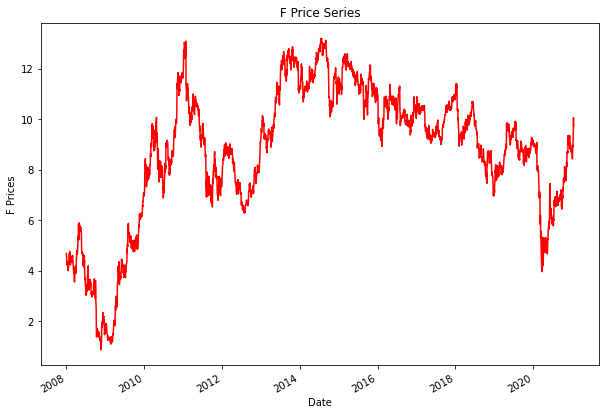

In [6]:
data.Close.plot(figsize=(10, 7),color='r')
plt.ylabel("{} Prices".format(stocks))
plt.title("{} Price Series".format(stocks))
plt.show()

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Close', ylabel='Density'>

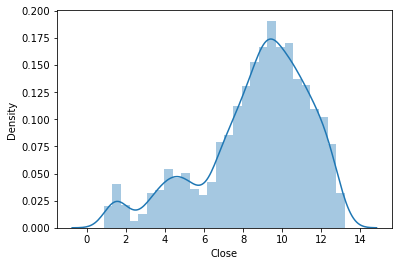

In [7]:
sns.distplot(data["Close"])

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Open', ylabel='Density'>

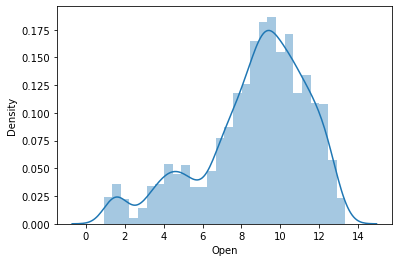

In [8]:
sns.distplot(data["Open"])

/Library/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='High', ylabel='Density'>

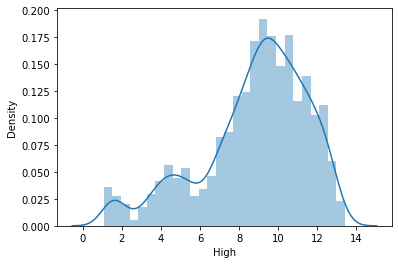

In [9]:
sns.distplot(data["High"])

In [10]:
# Conlusions  

# - Shape the of the data  
# - how our data is distributed 
# - It's very very non linear  

# Linear, Logis, Regularized, SVM 

X = data.drop("Close", axis=1) 
y = data["Close"] 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test  = train_test_split(X,y,test_size=0.2, random_state=0) 
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(2628, 4)
(657, 4)
(2628,)
(657,)


In [11]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression() 
lr.fit(X_train, y_train) 
pred1 = lr.predict(X_test)

In [12]:
# MSE -- > Mean Squared   
# RMSE ---> sart(MSE) 
# r2_square ---> 1.0 # good model 

from sklearn.metrics import mean_squared_error, r2_score 


def calculate_metrics(y_test, y_pred):  
    ''' 
    y_test:- ground truth 
    y_pred:- model predict  
    '''
    mse = mean_squared_error(y_test, y_pred) 
    rmse = np.sqrt(mse) 
    r2_scors = r2_score(y_test, y_pred) 
    
    print("MSE:- ", mse) 
    print("RMSE:- ", rmse) 
    print("R2_score:- ", r2_scors) 
    
calculate_metrics(y_test, pred1)

MSE:-  0.00634008477959547
RMSE:-  0.07962464932164832
R2_score:-  0.9991149194210612


In [13]:
from sklearn.linear_model import Lasso, Ridge 

la = Lasso().fit(X_train, y_train )
ri = Ridge().fit(X_train, y_train ) 

la_p = la.predict(X_test) 
ri_p = ri.predict(X_test)

/Library/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=2.39383e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,


In [14]:
calculate_metrics(y_test, la_p)

MSE:-  0.15904654210633992
RMSE:-  0.39880639677209284
R2_score:-  0.9777969837219331


In [15]:
calculate_metrics(y_test, ri_p)

MSE:-  0.006184149311192109
RMSE:-  0.07863936235240027
R2_score:-  0.9991366881291227


In [16]:
from sklearn.svm import SVR 
from sklearn.model_selection import GridSearchCV 

svr = SVR() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}   

grid = GridSearchCV(SVR(), param_grid, refit=True, verbose=3)    
grid.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.6s
[CV 2/5] END ..................C=0.1, gamma=0.0

GridSearchCV(estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [17]:
svr = SVR(C=10, gamma=0.01, kernel='rbf') 
svr.fit(X_train, y_train) 
svr_pred = svr.predict(X_test) 

In [18]:
import joblib  

joblib.dump(ri, 'model.pkl') 

ridge_from_joblib = model = joblib.load("model.pkl")